# Smart City Monopoly: AI-Powered Crisis Management Exploratory Data Analysis

In [ ]:
from google.colab import drive
from zipfile import ZipFile

drive.mount('/content/drive')
path = '/content/drive/Shareddrives/AggieHacks2025/Smart_City_Dataset.zip'

with ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall("smart_city_data")

# Define folders
essential_path = "smart_city_data/Essential_Data"
distractor_path = "smart_city_data/Distractor_Data"

Mounted at /content/drive


In [ ]:
def eda_summary(df):
  # Basic information
  eda_report = {}
  eda_report['shape'] = df.shape
  eda_report['columns'] = df.columns.tolist()
  eda_report['missing_values'] = df.isnull().sum()
  eda_report['dtypes'] = df.dtypes

  # Show basic EDA summary
  eda_report['value_counts'] = {}
  for col in df.columns:
      if df[col].dtype == 'object' or df[col].dtype.name == 'category':
          eda_report['value_counts'][col] = df[col].value_counts().to_dict()

  for key in eda_report.keys():
    print(key, "\n", eda_report[key], "\n")

## Disaster Events
EDA on disaster_events.csv

Key Insights:
- Time range: Hourly disaster snapshot from 2010-2015
- Approximately uniform distribution among disaster type, zones (disaster location), and disaster severity
-  No correlation between industrial accidents and natural disasters


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Essential_Data/disaster_events.csv", parse_dates=["date"])

# Basic information
eda_report = {}
eda_report['shape'] = df.shape
eda_report['columns'] = df.columns.tolist()
eda_report['missing_values'] = df.isnull().sum()
eda_report['dtypes'] = df.dtypes

# Show basic EDA summary
eda_report['value_counts'] = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        eda_report['value_counts'][col] = df[col].value_counts().to_dict()

for key in eda_report.keys():
  print(key, "\n", eda_report[key], "\n")

shape 
 (50000, 10) 

columns 
 ['event_id', 'date', 'location', 'latitude', 'longitude', 'disaster_type', 'severity', 'casualties', 'economic_loss_million_usd', 'duration_hours'] 

missing_values 
 event_id                     0
date                         0
location                     0
latitude                     0
longitude                    0
disaster_type                0
severity                     0
casualties                   0
economic_loss_million_usd    0
duration_hours               0
dtype: int64 

dtypes 
 event_id                              int64
date                         datetime64[ns]
location                             object
latitude                            float64
longitude                           float64
disaster_type                        object
severity                              int64
casualties                            int64
economic_loss_million_usd           float64
duration_hours                        int64
dtype: object 

value_count

In [ ]:
# Convert timestamp if applicable
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour

# Numerical correlation matrix
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

# Category vs severity analysis if 'disaster_type' and 'severity' exist
if 'disaster_type' in df.columns and 'severity' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='disaster_type', y='severity')
    plt.title("Severity Distribution by Disaster Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot correlations
if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix of Numerical Features")
    plt.tight_layout()
    plt.show()

# Time trend of disasters
if 'timestamp' in df.columns and 'disaster_type' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby(['year', 'disaster_type']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title("Disaster Events Over Time by Type")
    plt.xlabel("Year")
    plt.ylabel("Number of Events")
    plt.tight_layout()
    plt.show()

## Sensor Data
EDA on sensor_data.csv

Key Insights:
- Minute-by-minute sensor readings from various sensors starting from January 2023 to February 2023
- Uniform distribution of sensor types, status, and their locations
- Sensor Readings vary depending on sensor status

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Essential_Data/sensor_readings.csv", parse_dates=["timestamp"])

eda_summary(df)

shape 
 (50000, 7) 

columns 
 ['sensor_id', 'timestamp', 'latitude', 'longitude', 'sensor_type', 'reading_value', 'status'] 

missing_values 
 sensor_id        0
timestamp        0
latitude         0
longitude        0
sensor_type      0
reading_value    0
status           0
dtype: int64 

dtypes 
 sensor_id                 int64
timestamp        datetime64[ns]
latitude                float64
longitude               float64
sensor_type              object
reading_value           float64
status                   object
dtype: object 

value_counts 
 {'sensor_type': {'seismic': 12571, 'flood': 12545, 'humidity': 12461, 'temp': 12423}, 'status': {'active': 16846, 'faulty': 16591, 'inactive': 16563}} 



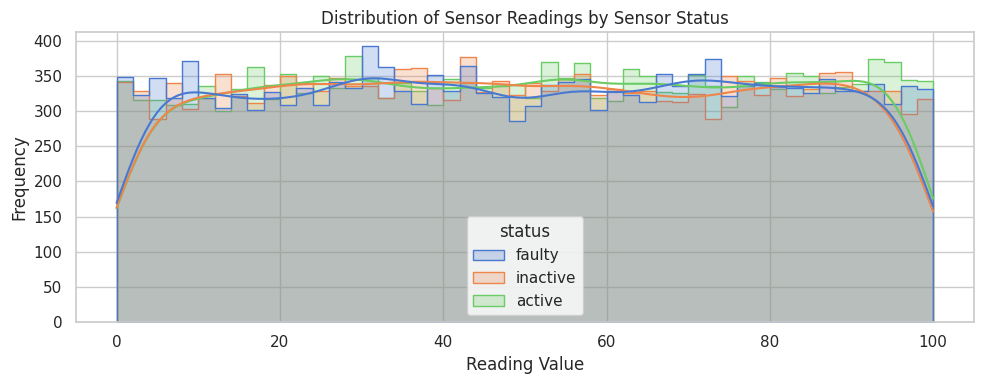

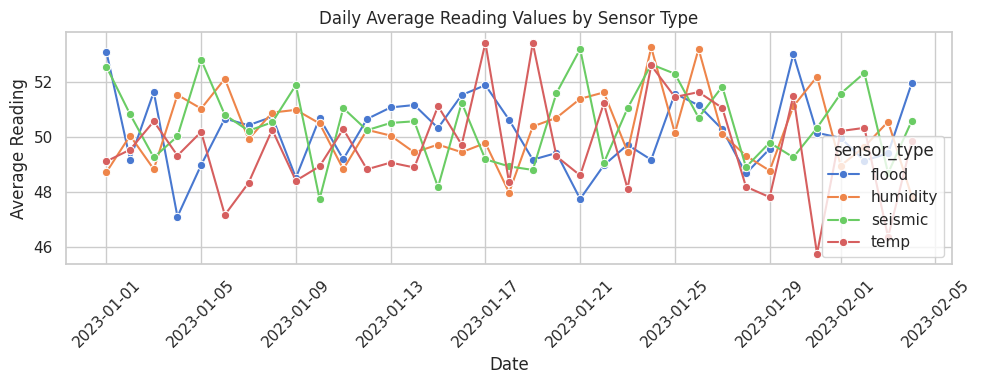

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

# Set up the plotting aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 4)

# Plot the distribution of reading values by sensor type
plt.figure()
sns.histplot(data=df, x="reading_value", hue="status", bins=50, kde=True, element="step", common_norm=False)
plt.title("Distribution of Sensor Readings by Sensor Status")
plt.xlabel("Reading Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Time series trend of average reading value by day
df['date'] = df['timestamp'].dt.date
daily_avg = df.groupby(['date', 'sensor_type'])['reading_value'].mean().reset_index()

plt.figure()
sns.lineplot(data=daily_avg, x="date", y="reading_value", hue="sensor_type", marker="o")
plt.title("Daily Average Reading Values by Sensor Type")
plt.xlabel("Date")
plt.ylabel("Average Reading")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Weather Data
EDA on weather_historical.csv

Key Insights:
- Hourly sensor readings from various sensors starting from January 2023 to September 2028
  - This may be an error, we will be assuming minute changes instead
-
- Sensor Readings vary depending on sensor status

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Essential_Data/weather_historical.csv", parse_dates=["timestamp"])

eda_summary(df)

shape 
 (50000, 6) 

columns 
 ['timestamp', 'temperature_C', 'humidity_%', 'wind_speed_kmph', 'pressure_hPa', 'precipitation_mm'] 

missing_values 
 timestamp           0
temperature_C       0
humidity_%          0
wind_speed_kmph     0
pressure_hPa        0
precipitation_mm    0
dtype: int64 

dtypes 
 timestamp           datetime64[ns]
temperature_C              float64
humidity_%                 float64
wind_speed_kmph            float64
pressure_hPa               float64
precipitation_mm           float64
dtype: object 

value_counts 
 {} 



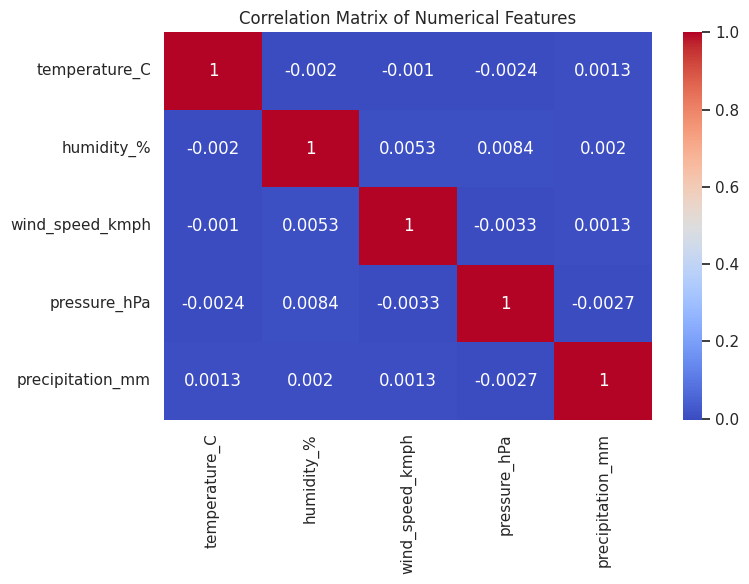

In [ ]:
# Numerical correlation matrix
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

# Plot correlations
if len(numerical_cols) > 1:
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix of Numerical Features")
    plt.tight_layout()
    plt.show()

## Hospital Energy Data
EDA on energy_consumption.csv

Key Insights:
- Minute-by-minute readings on hospital energy consumption
- Uniformly distributed across zones
- Dips and spikes according to day, hour of day

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Distractor_Data/energy_consumption.csv", parse_dates=["timestamp"])

eda_summary(df)

shape 
 (50000, 3) 

columns 
 ['building_id', 'timestamp', 'energy_kwh'] 

missing_values 
 building_id    0
timestamp      0
energy_kwh     0
dtype: int64 

dtypes 
 building_id             int64
timestamp      datetime64[ns]
energy_kwh            float64
dtype: object 

value_counts 
 {} 



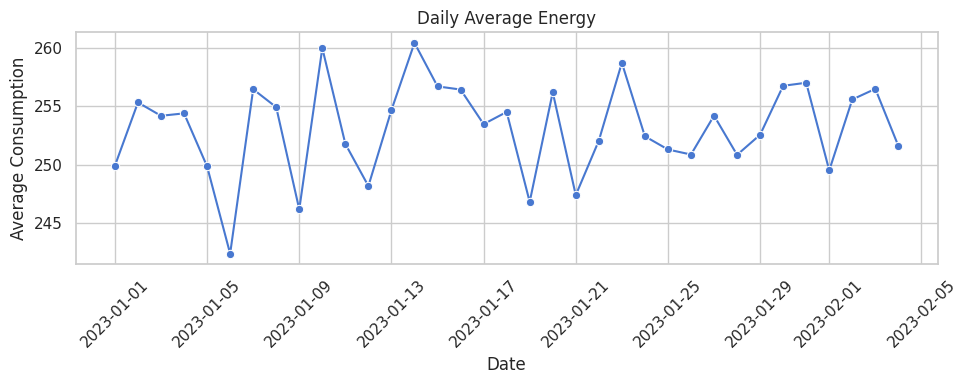

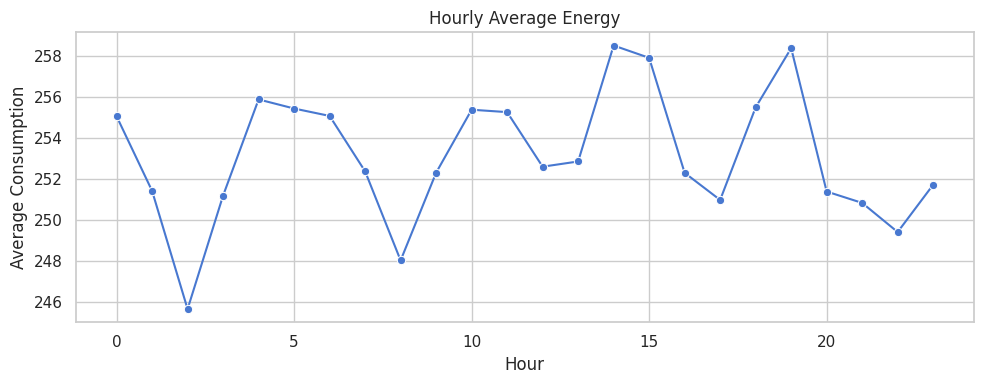

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

# Set up the plotting aesthetics
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 4)

# Time series trend of average reading value by day
df['date'] = df['timestamp'].dt.date
daily_avg = df.groupby(['date'])['energy_kwh'].mean().reset_index()

plt.figure()
sns.lineplot(data=daily_avg, x="date", y="energy_kwh", marker="o")
plt.title("Daily Average Energy")
plt.xlabel("Date")
plt.ylabel("Average Consumption")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Time series trend of average reading value by day
df['hour'] = df['timestamp'].dt.hour
daily_avg = df.groupby(['hour'])['energy_kwh'].mean().reset_index()

plt.figure()
sns.lineplot(data=daily_avg, x="hour", y="energy_kwh", marker="o")
plt.title("Hourly Average Energy")
plt.xlabel("Hour")
plt.ylabel("Average Consumption")
plt.tight_layout()
plt.show()

## Social Media Stream

Key Insights
- Minute-by-minute collection of social media posts starting from January 2023
- Approximately uniform distribution of text types

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Essential_Data/social_media_stream.csv", parse_dates=["timestamp"])

eda_summary(df)

shape 
 (50000, 5) 

columns 
 ['user_id', 'text', 'timestamp', 'latitude', 'longitude'] 

missing_values 
 user_id      0
text         0
timestamp    0
latitude     0
longitude    0
dtype: int64 

dtypes 
 user_id               int64
text                 object
timestamp    datetime64[ns]
latitude            float64
longitude           float64
dtype: object 

value_counts 
 {'text': {'flood near river': 10119, 'emergency in Zone A': 10092, 'fire in downtown': 10062, 'earthquake felt': 9897, 'evacuate Zone C': 9830}} 



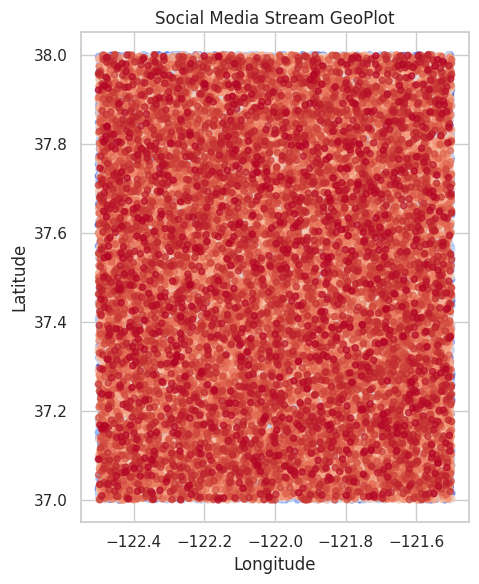

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Drop rows with missing coordinates
df = df.dropna(subset=["latitude", "longitude"])

# Convert to GeoDataFrame
geometry_social = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf_social = gpd.GeoDataFrame(df, geometry=geometry_social)
gdf_social.set_crs(epsg=4326, inplace=True)

# Plot social media messages by trust score or keyword presence
fig, ax = plt.subplots(figsize=(10, 6))
gdf_social.plot(
    ax=ax,
    column='trust_score' if 'trust_score' in gdf_social.columns else None,
    cmap='coolwarm',
    legend=True,
    markersize=20,
    alpha=0.7
)

plt.title("Social Media Stream GeoPlot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


## City Map Data

Shape: (1000, 3)

Columns: ['name', 'type', 'geometry']

Sample rows:
          name          type                     geometry
0  Location 0      hospital  POINT (-122.49262 37.43284)
1  Location 1  fire_station  POINT (-122.31882 37.62275)
2  Location 2      hospital  POINT (-121.53621 37.76063)
3  Location 3      hospital  POINT (-121.84106 37.77047)
4  Location 4      hospital   POINT (-122.11221 37.7773)

Geometry types: Point    1000
Name: count, dtype: int64

CRS: EPSG:4326


<Axes: >

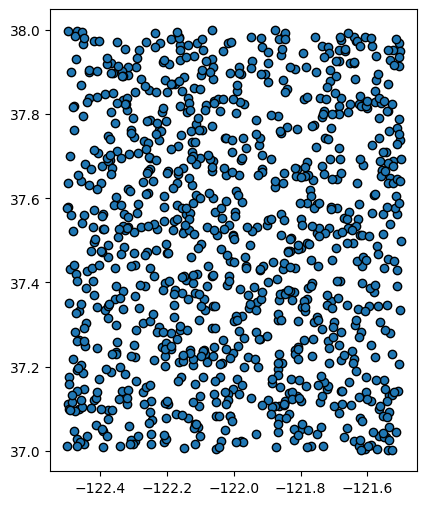

In [ ]:
!pip install geopandas

import geopandas as gpd

geojson_path = "smart_city_data/Essential_Data/city_map.geojson"

gdf = gpd.read_file(geojson_path)

# Basic shape and structure
print("Shape:", gdf.shape)
print("\nColumns:", gdf.columns.tolist())

# Peek at feature-level properties
print("\nSample rows:\n", gdf.head())

# Check geometry type
print("\nGeometry types:", gdf.geom_type.value_counts())

# CRS (Coordinate Reference System)
print("\nCRS:", gdf.crs)

gdf.plot(edgecolor='black', figsize=(10, 6))

## Economic Activity Data


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Distractor_Data/economic_activity.csv", parse_dates=["date"])

eda_summary(df)

shape 
 (50000, 4) 

columns 
 ['business_id', 'date', 'revenue_usd', 'transactions'] 

missing_values 
 business_id     0
date            0
revenue_usd     0
transactions    0
dtype: int64 

dtypes 
 business_id              int64
date            datetime64[ns]
revenue_usd            float64
transactions             int64
dtype: object 

value_counts 
 {} 



## Transportation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Distractor_Data/transportation.csv", parse_dates=["arrival_time", "departure_time"])

eda_summary(df)

shape 
 (50000, 5) 

columns 
 ['route_id', 'vehicle_id', 'departure_time', 'arrival_time', 'status'] 

missing_values 
 route_id          0
vehicle_id        0
departure_time    0
arrival_time      0
status            0
dtype: int64 

dtypes 
 route_id                   int64
vehicle_id                 int64
departure_time    datetime64[ns]
arrival_time      datetime64[ns]
status                    object
dtype: object 

value_counts 
 {'status': {'delayed': 25140, 'on_time': 24860}} 



## Local Business Reviews

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Distractor_Data/local_business_reviews.csv")

eda_summary(df)

shape 
 (50000, 5) 

columns 
 ['review_id', 'user_id', 'business_name', 'rating', 'review_text'] 

missing_values 
 review_id        0
user_id          0
business_name    0
rating           0
review_text      0
dtype: int64 

dtypes 
 review_id         int64
user_id           int64
business_name    object
rating            int64
review_text      object
dtype: object 

value_counts 
 {'business_name': {'Cafe A': 12618, 'Store C': 12561, 'Gym B': 12424, 'Mall D': 12397}, 'review_text': {'great place': 12590, 'will visit again': 12567, 'not clean': 12458, 'bad service': 12385}} 



## Events Calendar

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/smart_city_data/Distractor_Data/events_calendar.csv", parse_dates=["date"])

eda_summary(df)

shape 
 (50000, 5) 

columns 
 ['event_id', 'name', 'date', 'location', 'type'] 

missing_values 
 event_id    0
name        0
date        0
location    0
type        0
dtype: int64 

dtypes 
 event_id             int64
name                object
date        datetime64[ns]
location            object
type                object
dtype: object 

value_counts 
 {'name': {'Event 49984': 1, 'Event 49983': 1, 'Event 49982': 1, 'Event 49981': 1, 'Event 49980': 1, 'Event 49979': 1, 'Event 49978': 1, 'Event 49977': 1, 'Event 49976': 1, 'Event 49975': 1, 'Event 49974': 1, 'Event 49973': 1, 'Event 49972': 1, 'Event 49971': 1, 'Event 49970': 1, 'Event 49969': 1, 'Event 32': 1, 'Event 31': 1, 'Event 30': 1, 'Event 29': 1, 'Event 28': 1, 'Event 27': 1, 'Event 26': 1, 'Event 25': 1, 'Event 24': 1, 'Event 23': 1, 'Event 22': 1, 'Event 21': 1, 'Event 20': 1, 'Event 19': 1, 'Event 18': 1, 'Event 17': 1, 'Event 48': 1, 'Event 47': 1, 'Event 46': 1, 'Event 45': 1, 'Event 44': 1, 'Event 43': 1, 'Event 42': 1

# Smart City Monopoly: AI-Powered Crisis Management Model

# Cascade Prediction

## Pain Point/Issue
Cascading emergencies compounds the amount of damage that can occur during an event. Being able to accurately assess the risk of such an occurrence will help allocate critical emergency response and relief.

## Data Used
- Sensor Data: sensor_readings.csv
- Hospital & Power Logs: energy_consumption.csv
- Disaster Events: disaster_events.csv
- Historical Data of Weather: weather_historical.csv
- City Map

## Transformations/Data Processing
- Merged datasets (sensor, energy, weather)
- Added zones to merged dataset via geo and disaster events data

## Model(s) Used
- LSTM to detect anomalies in sensor readings
- LSTM to detect disaster and cascade risk
- GNN to detect how emergencies + zones are connected to determine risk


## Code

#### Loading Datasets

In [ ]:
%pip install geopandas
import pandas as pd
import geopandas as gpd

# Load datasets
sensor_df = pd.read_csv("Smart_City_Dataset/Essential_Data/sensor_readings.csv", parse_dates=["timestamp"])
disaster_df = pd.read_csv("Smart_City_Dataset/Essential_Data/disaster_events.csv", parse_dates=["date"])
energy_df = pd.read_csv("Smart_City_Dataset/Distractor_Data/energy_consumption.csv", parse_dates=["timestamp"])
weather_df = pd.read_csv("Smart_City_Dataset/Essential_Data/weather_historical.csv", parse_dates=["timestamp"])
zones_gdf = gpd.read_file("Smart_City_Dataset/Essential_Data/city_map.geojson")

Note: you may need to restart the kernel to use updated packages.


### Anomaly Detection using LSTMS

#### Sensor Anomalies

In [ ]:
# === Install dependencies ===
%pip install scikit-learn tensorflow -q

# === Load and preprocess data ===
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = sensor_df

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["status", "sensor_type"])

# Drop unnecessary or non-numeric columns
feature_cols = [col for col in df.columns if col not in ["timestamp", "sensor_id", "latitude", "longitude"]]
df = df.dropna(subset=feature_cols)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# === Create sequences ===
def create_sequences(data, window_size=15):
    return np.array([data[i:i+window_size] for i in range(len(data) - window_size)])

WINDOW_SIZE = 15
X = create_sequences(X_scaled, window_size=WINDOW_SIZE)

# === Build LSTM Autoencoder ===
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# === LSTM Autoencoder ===
model = Sequential([
    LSTM(32, activation="relu", input_shape=(WINDOW_SIZE, X.shape[2]), return_sequences=False),
    RepeatVector(WINDOW_SIZE),
    LSTM(32, activation="relu", return_sequences=True),
    TimeDistributed(Dense(X.shape[2]))
])
model.compile(optimizer="adam", loss="mse")
model.fit(X, X, epochs=5, batch_size=128, validation_split=0.1, shuffle=True)

# === Predict anomalies ===
X_pred = model.predict(X)
mse = np.mean((X - X_pred)**2, axis=(1, 2))
threshold = np.mean(mse) + 2 * np.std(mse)
anomalies = mse > threshold

sensor_df = df

# === Add anomaly column ===
sensor_df["is_sensor_anomaly"] = False
sensor_df.loc[WINDOW_SIZE:, "is_sensor_anomaly"] = anomalies

# Save output
sensor_df.to_csv("sensor_data_with_anomalies.csv", index=False)

Note: you may need to restart the kernel to use updated packages.
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1778 - val_loss: 0.1553
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1531 - val_loss: 0.1487
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1475 - val_loss: 0.1452
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1444 - val_loss: 0.1422
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1408 - val_loss: 0.1391
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [ ]:
sensor_df['is_sensor_anomaly'].value_counts()

is_sensor_anomaly
False    48444
True      1556
Name: count, dtype: int64

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=4.556e-03, with an active set of 19 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 40 iterations, alpha=2.731e-03, previous alpha=2.513e-03, with an active set of 29 regressors.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 37 iterations, i.e. alp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


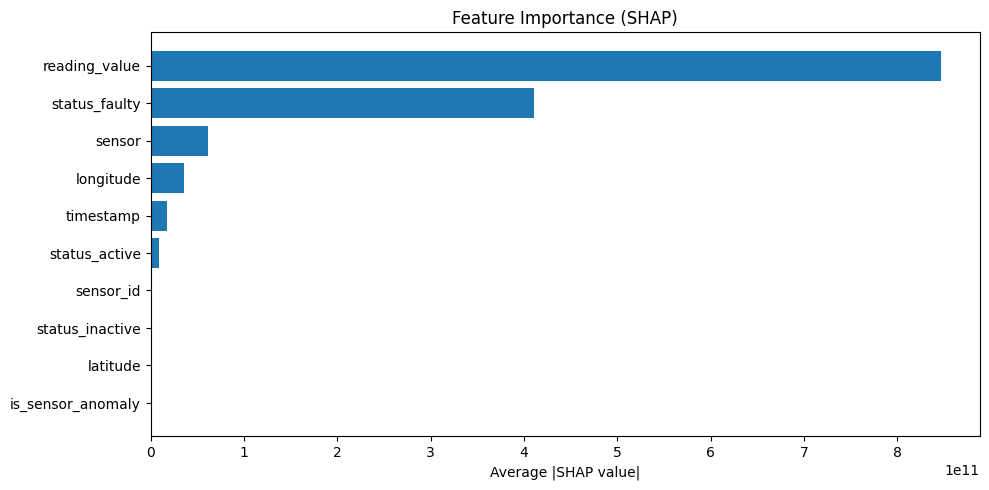

In [ ]:
# %pip install shap
import shap
import tensorflow as tf

# === Step 1: Flatten sequences ===
X_sample = X[:100]
X_flat = X_sample.reshape((X_sample.shape[0], -1))

# === Step 2: Define prediction function ===
def model_predict_flat(x):
    x_seq = x.reshape((x.shape[0], X_sample.shape[1], X_sample.shape[2]))
    pred = model.predict(x_seq)
    return pred.reshape(x.shape[0], -1)

# === Step 3: SHAP setup ===
import shap
explainer = shap.KernelExplainer(model_predict_flat, X_flat)
shap_values = explainer.shap_values(X_flat[:10], nsamples=100)

# === Step 4: Aggregate SHAP values per feature (ignore timestep split) ===
import numpy as np
mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 1))  # average across samples and output dims

# === Step 5: Map to feature names ===
feature_names = df.columns  # replace this with your true list
shap_feature_names = [f"{f}_t{t}" for t in range(X_sample.shape[1]) for f in feature_names]

# === Step 6: Collapse by base feature (ignore timestep)
from collections import defaultdict

feature_importance = defaultdict(float)
for name, value in zip(shap_feature_names, mean_abs_shap):
    base = name.split("_t")[0]
    feature_importance[base] += value

# === Step 7: Plot as bar chart ===
import matplotlib.pyplot as plt

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_features)

plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], values[::-1])
plt.title("Feature Importance (SHAP)")
plt.xlabel("Average |SHAP value|")
plt.tight_layout()
plt.show()



#### Energy Anomalies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

df = energy_df

# Drop non-numeric or non-informative columns (keep latitude/longitude if helpful)
feature_cols = [col for col in df.columns if col not in ["timestamp", "latitude", "longitude"]]
df = df.dropna(subset=feature_cols)

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# === Create rolling sequences ===
WINDOW_SIZE = 30

def create_sequences(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
    return np.array(X)

X_seq = create_sequences(X_scaled, window_size=WINDOW_SIZE)

# === LSTM Autoencoder ===
model = Sequential([
    LSTM(32, activation="relu", input_shape=(WINDOW_SIZE, X_seq.shape[2]), return_sequences=False),
    RepeatVector(WINDOW_SIZE),
    LSTM(32, activation="relu", return_sequences=True),
    TimeDistributed(Dense(X_seq.shape[2]))
])
model.compile(optimizer="adam", loss="mse")
model.fit(X_seq, X_seq, epochs=5, batch_size=128, validation_split=0.1, shuffle=True)

# === Predict anomalies ===
X_pred = model.predict(X_seq)
mse = np.mean((X_seq - X_pred)**2, axis=(1, 2))
threshold = np.mean(mse) + 2 * np.std(mse)
anomalies = mse > threshold

df = energy_df

# === Add anomaly column ===
energy_df["is_energy_anomaly"] = False
energy_df.loc[WINDOW_SIZE:, "is_energy_anomaly"] = anomalies

# Save output
energy_df.to_csv("energy_data_with_anomalies.csv", index=False)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.0918 - val_loss: 0.0598
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0570 - val_loss: 0.0574
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0551 - val_loss: 0.0564
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0543 - val_loss: 0.0556
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0535 - val_loss: 0.0549
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


In [ ]:
energy_df['is_energy_anomaly'].value_counts()

is_energy_anomaly
False    47298
True      2702
Name: count, dtype: int64

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


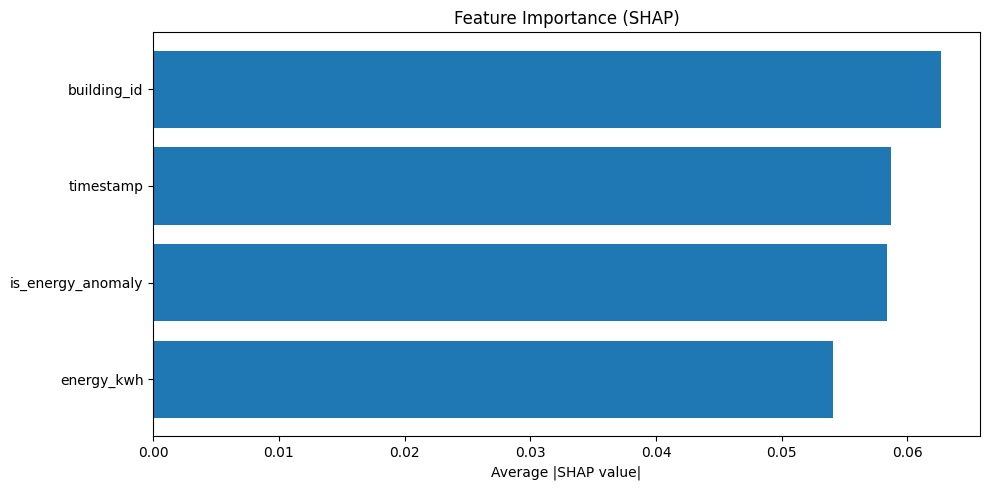

In [ ]:
# === Step 1: Flatten sequences ===
X_sample = X_seq[:100]
X_flat = X_sample.reshape((X_sample.shape[0], -1))

# === Step 2: Define prediction function ===
def model_predict_flat(x):
    x_seq = x.reshape((x.shape[0], X_sample.shape[1], X_sample.shape[2]))
    pred = model.predict(x_seq)
    return pred.reshape(x.shape[0], -1)

# === Step 3: SHAP setup ===
import shap
explainer = shap.KernelExplainer(model_predict_flat, X_flat)
shap_values = explainer.shap_values(X_flat[:10], nsamples=100)

# === Step 4: Aggregate SHAP values per feature (ignore timestep split) ===
import numpy as np
mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 1))  # average across samples and output dims

# === Step 5: Map to feature names ===
feature_names = df.columns  # replace this with your true list
shap_feature_names = [f"{f}_t{t}" for t in range(X_sample.shape[1]) for f in feature_names]

# === Step 6: Collapse by base feature (ignore timestep)
from collections import defaultdict

feature_importance = defaultdict(float)
for name, value in zip(shap_feature_names, mean_abs_shap):
    base = name.split("_t")[0]
    feature_importance[base] += value

# === Step 7: Plot as bar chart ===
import matplotlib.pyplot as plt

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_features)

plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], values[::-1])
plt.title("Feature Importance (SHAP)")
plt.xlabel("Average |SHAP value|")
plt.tight_layout()
plt.show()


#### Weather

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = weather_df

# Select only numerical features
numerical_features = [
    "temperature_C", "humidity_%", "wind_speed_kmph",
    "pressure_hPa", "precipitation_mm"
]
df = df.dropna(subset=numerical_features)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[numerical_features])

# === Create sequences for LSTM input ===
WINDOW_SIZE = 30

def create_sequences(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
    return np.array(X)

X_seq = create_sequences(X_scaled, window_size=WINDOW_SIZE)

# === LSTM Autoencoder ===
model = Sequential([
    LSTM(32, activation="relu", input_shape=(WINDOW_SIZE, X_seq.shape[2]), return_sequences=False),
    RepeatVector(WINDOW_SIZE),
    LSTM(32, activation="relu", return_sequences=True),
    TimeDistributed(Dense(X_seq.shape[2]))
])
model.compile(optimizer="adam", loss="mse")
model.fit(X_seq, X_seq, epochs=5, batch_size=128, validation_split=0.1, shuffle=True)

# === Predict anomalies ===
X_pred = model.predict(X_seq)
mse = np.mean((X_seq - X_pred)**2, axis=(1, 2))
threshold = np.mean(mse) + 2 * np.std(mse)
anomalies = mse > threshold

df = weather_df

# === Add anomaly column ===
weather_df["is_weather_anomaly"] = False
weather_df.loc[WINDOW_SIZE:, "is_weather_anomaly"] = anomalies

# Save output
weather_df.to_csv("weather_data_with_anomalies.csv", index=False)

weather_df['is_weather_anomaly'].value_counts()

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - loss: 0.1488 - val_loss: 0.0827
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0817 - val_loss: 0.0816
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0808 - val_loss: 0.0814
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0806 - val_loss: 0.0813
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0806 - val_loss: 0.0808
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


is_weather_anomaly
False    48694
True      1306
Name: count, dtype: int64

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.737e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 92 iterations, alpha=1.186e-03, previous alpha=1.158e-03, with an active set of 31 regressors.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 73 iterations, alpha=1.346e-05, previous alpha=1.146e-05, with an active set of 48 regressors.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 69 iterations, alpha=1.550e-05, previous alpha=1.330e-05, with an active set of 48 regressors.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 49 iterations, i.e. alpha=1.411e-04, with an active

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


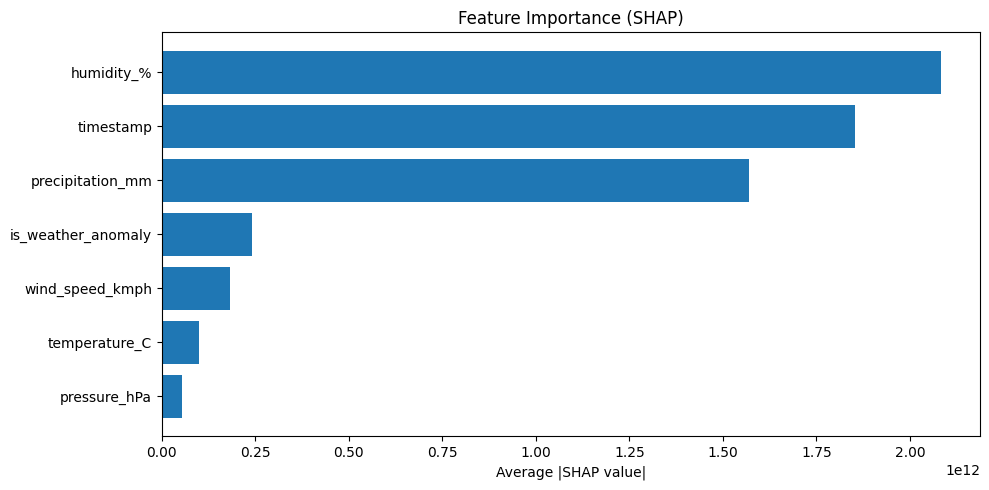

In [ ]:
# === Step 1: Flatten sequences ===
X_sample = X_seq[:100]
X_flat = X_sample.reshape((X_sample.shape[0], -1))

# === Step 2: Define prediction function ===
def model_predict_flat(x):
    x_seq = x.reshape((x.shape[0], X_sample.shape[1], X_sample.shape[2]))
    pred = model.predict(x_seq)
    return pred.reshape(x.shape[0], -1)

# === Step 3: SHAP setup ===
import shap
explainer = shap.KernelExplainer(model_predict_flat, X_flat)
shap_values = explainer.shap_values(X_flat[:10], nsamples=100)

# === Step 4: Aggregate SHAP values per feature (ignore timestep split) ===
import numpy as np
mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 1))  # average across samples and output dims

# === Step 5: Map to feature names ===
feature_names = df.columns  # replace this with your true list
shap_feature_names = [f"{f}_t{t}" for t in range(X_sample.shape[1]) for f in feature_names]

# === Step 6: Collapse by base feature (ignore timestep)
from collections import defaultdict

feature_importance = defaultdict(float)
for name, value in zip(shap_feature_names, mean_abs_shap):
    base = name.split("_t")[0]
    feature_importance[base] += value

# === Step 7: Plot as bar chart ===
import matplotlib.pyplot as plt

sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_features)

plt.figure(figsize=(10, 5))
plt.barh(labels[::-1], values[::-1])
plt.title("Feature Importance (SHAP)")
plt.xlabel("Average |SHAP value|")
plt.tight_layout()
plt.show()

#### Merging Data

In [ ]:
from sklearn.neighbors import NearestNeighbors

weather_df = weather_df.copy()
start_time = sensor_df["timestamp"].min()
weather_df["timestamp"] = pd.date_range(start=start_time, periods=len(weather_df), freq="min")

# === Step 3: Merge by timestamp only (assuming alignment now) ===
merged_df = sensor_df.merge(energy_df, on="timestamp", suffixes=("_sensor", "_energy"))
merged_df = merged_df.merge(weather_df, on="timestamp")

# === Step 4: Assign zones using disaster data as labeled zone source ===
disaster_gdf = gpd.GeoDataFrame(
    disaster_df,
    geometry=gpd.points_from_xy(disaster_df.longitude, disaster_df.latitude),
    crs="EPSG:4326"
)

# Prepare disaster coordinates and zones
disaster_coords = disaster_gdf[["latitude", "longitude"]].values
disaster_zones = disaster_gdf["location"].values

# Train nearest neighbors model
nn_model = NearestNeighbors(n_neighbors=1, algorithm="ball_tree")
nn_model.fit(disaster_coords)

# Assign zone function
def assign_zones(df, lat_col="latitude", lon_col="longitude"):
    coords = df[[lat_col, lon_col]].values
    _, indices = nn_model.kneighbors(coords)
    df = df.copy()
    df["zone"] = disaster_zones[indices.flatten()]
    return df

# Apply zone assignment on merged data (using weather lat/lon)
merged_df = assign_zones(merged_df, lat_col="latitude", lon_col="longitude")

# === Optional: Save to file ===
merged_df.to_csv("combined_city_data.csv", index=False)
merged_df.head()

sensor_id           timestamp   latitude   longitude  reading_value  \
0       1271 2023-01-01 00:00:00  37.367661 -121.830228      78.766430   
1       1865 2023-01-01 00:01:00  37.273309 -121.996369      16.076887   
2       1657 2023-01-01 00:02:00  37.272227 -121.645901      24.018219   
3       1223 2023-01-01 00:03:00  37.007146 -122.183781      19.157472   
4       1503 2023-01-01 00:04:00  37.706890 -122.436968      51.067159   

   is_sensor_anomaly  status_active  status_faulty  status_inactive  \
0              False          False           True            False   
1              False          False           True            False   
2              False          False          False             True   
3              False           True          False            False   
4              False          False          False             True   

   sensor_type_flood  ...  building_id  energy_kwh  is_energy_anomaly  \
0              False  ...          739  326.068439              False   
1              False  ...          243  200.068872              False   
2              False  ...          493  350.674392              False   
3              False  ...          940  396.929660              False   
4              False  ...           54  319.242541              False   

   temperature_C  humidity_%  wind_speed_kmph  pressure_hPa  precipitation_mm  \
0      15.547673   19.091824        98.296769   1028.228150         78.689019   
1      18.215934   10.802266        99.367106    987.238259         93.307601   
2      29.257147   73.384331        30.453475   1026.653997        174.938477   
3      35.591718   60.379030        80.650223    975.621499         19.457702   
4       2.433792   59.640988        53.124004    967.169939         59.739675   

   is_weather_anomaly    zone  
0               False  Zone C  
1               False  Zone B  
2               False  Zone A  
3               False  Zone A  
4               False  Zone D  

[5 rows x 23 columns]

In [ ]:
import pandas as pd

# Load dataset
df = merged_df

# Calculate cascade risk score using weighted anomalies
df["cascade_risk_score"] = (
    0.6 * df["is_sensor_anomaly"].fillna(0) +
    0.25 * df["is_energy_anomaly"].fillna(0) +
    0.15 * df["is_weather_anomaly"].fillna(0)
)

# Clip to range [0, 1]
df["cascade_risk_score"] = df["cascade_risk_score"].clip(0, 1)

# Save or preview
df.to_csv("combined_city_data_with_risk.csv", index=False)
df[["timestamp", "zone", "cascade_risk_score"]].head()


timestamp    zone  cascade_risk_score
0 2023-01-01 00:00:00  Zone C                 0.0
1 2023-01-01 00:01:00  Zone B                 0.0
2 2023-01-01 00:02:00  Zone A                 0.0
3 2023-01-01 00:03:00  Zone A                 0.0
4 2023-01-01 00:04:00  Zone D                 0.0

### GNN for Additional Cascade Risk

In [ ]:
%pip install torch_geometric

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Reload the dataset
df = merged_df

# One-hot encode 'zone'
zone_ohe = pd.get_dummies(df["zone"], prefix="zone")
df = pd.concat([df, zone_ohe], axis=1)

# Drop rows with missing values
required_cols = [
    "latitude", "longitude", "cascade_risk_score",
    "reading_value", "energy_kwh", "temperature_C", "humidity_%",
    "wind_speed_kmph", "pressure_hPa", "precipitation_mm",
    "is_sensor_anomaly", "is_energy_anomaly", "is_weather_anomaly"
] + list(zone_ohe.columns)

df = df.dropna(subset=required_cols).reset_index(drop=True)

# Build feature matrix
feature_cols = [
    "reading_value", "energy_kwh", "temperature_C", "humidity_%",
    "wind_speed_kmph", "pressure_hPa", "precipitation_mm",
    "is_sensor_anomaly", "is_energy_anomaly", "is_weather_anomaly"
] + list(zone_ohe.columns)

scaler = MinMaxScaler()
X = torch.tensor(scaler.fit_transform(df[feature_cols]), dtype=torch.float32)

# Target
y = torch.tensor(df["cascade_risk_score"].values.reshape(-1, 1), dtype=torch.float32)

# Create edge index
coords = df[["latitude", "longitude"]].values
timestamps = df["timestamp"].astype(np.int64).values // 10**9
edges = []
radius = 0.01
time_window = 5 * 60

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if abs(timestamps[i] - timestamps[j]) > time_window:
            break
        dist = np.sqrt((coords[i][0] - coords[j][0])**2 + (coords[i][1] - coords[j][1])**2)
        if dist <= radius:
            edges.append([i, j])
            edges.append([j, i])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# PyG data object
data = Data(x=X, edge_index=edge_index, y=y)

# Define GNN model
class CascadeGNN(torch.nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, 64)
        self.conv2 = GCNConv(64, 32)
        self.out = torch.nn.Linear(32, 1)

    def forward(self, data):
        x = F.relu(self.conv1(data.x, data.edge_index))
        x = F.relu(self.conv2(x, data.edge_index))
        return torch.sigmoid(self.out(x))

# Train model
model = CascadeGNN(in_channels=X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

for epoch in range(10):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out, data.y)
    loss.backward()
    optimizer.step()
    if epoch % 2 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

# Add predictions to DataFrame
model.eval()
with torch.no_grad():
    df["predicted_cascade_risk"] = model(data).squeeze().numpy()



Epoch 0 | Loss: 0.2000
Epoch 2 | Loss: 0.1112
Epoch 4 | Loss: 0.0426
Epoch 6 | Loss: 0.0164
Epoch 8 | Loss: 0.0148


In [ ]:
df['cascade_risk'] = 0.2*df["predicted_cascade_risk"] + 0.8*df["cascade_risk"]

# Zone Risks + Visualizations

**Pain Point / Problem**

City officials struggle to visualize disaster risk in real time due to:

* Fragmented inputs (sensor data, disaster records, public chatter)
* Data noise (e.g., fake social posts, irrelevant events)
* Unclear mapping of severity by zone

This leads to:


* Misallocated resources
* Delayed evacuation or rerouting
* Public confusion and reduced trust

**Goal**

Develop an AI-powered visual layer that:

* Detects and maps real-time incidents and infrastructure risk
* Aggregates signals at the Zone level
* Outputs a structured summary table and interactive map
* Feeds this structured data to the Brain Agent for action decisions

In [ ]:
!pip install geopandas folium

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap, MarkerCluster

from google.colab import drive
drive.mount('/content/drive')

zip_path = "/content/drive/Shareddrives/AggieHacks2025/Smart_City_Dataset.zip"

from zipfile import ZipFile

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("smart_city_data")

# Load datasets
sensor_df = pd.read_csv("smart_city_data/Essential_Data/sensor_readings.csv")
disaster_df = pd.read_csv("smart_city_data/Essential_Data/disaster_events.csv")
geo_df = gpd.read_file("smart_city_data/Essential_Data/city_map.geojson")

## Data Preprocessing & Transformations

Judging focus: “Handles real-time complexity… Justifies how their system becomes the brain.”


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from folium import Map
from folium.plugins import HeatMap


# === Filter anomalies (faulty or inactive) ===
anomalies = sensor_df[sensor_df['status'].isin(['faulty', 'inactive'])].copy()

# Normalize intensity for heatmap visualization
anomalies['intensity'] = (
    (anomalies['reading_value'] - anomalies['reading_value'].min()) /
    (anomalies['reading_value'].max() - anomalies['reading_value'].min())
)

# Preview anomalies
anomalies[['sensor_id', 'status', 'reading_value', 'intensity']].head()


sensor_id    status  reading_value  intensity
0       1271    faulty      78.766430   0.787710
1       1865    faulty      16.076887   0.160777
2       1657  inactive      24.018219   0.240195
4       1503  inactive      51.067159   0.510701
6       1551    faulty      91.030860   0.910362

## Visual Plots / Maps

Judging focus: “Visual storytelling… Dashboard-style elements… Infrastructure awareness.”

In [ ]:
# Generate Folium heatmap
heat_data = anomalies[['latitude', 'longitude', 'intensity']].values.tolist()

heat_map = Map(location=[37.5, -122.0], zoom_start=10)
HeatMap(heat_data).add_to(heat_map)

# To display in Colab:
heat_map

## Summary Output for Brain Agent

Judging focus: “Explains model reasoning… Outputs structured, explainable data.”

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# Step 1: Load zone centroids
zone_centroids = pd.read_csv("zone_centroids_A_to_D.csv")
zone_centroids.rename(columns={'location': 'zone'}, inplace=True)

# Step 2: Build spatial lookup with KDTree
zone_points = zone_centroids[['latitude', 'longitude']].values
zone_names = zone_centroids['zone'].tolist()
zone_tree = cKDTree(zone_points)

# Step 3: Assign zones to sensor data
sensor_coords = sensor_df[['latitude', 'longitude']].values
_, indices = zone_tree.query(sensor_coords)
sensor_df['zone'] = [zone_names[i] for i in indices]

In [ ]:
sensor_summary = sensor_df.groupby('zone').agg(
    total_sensors=('sensor_id', 'count'),
    faulty_sensors=('status', lambda x: (x == 'faulty').sum()),
    inactive_sensors=('status', lambda x: (x == 'inactive').sum())
).reset_index()

In [ ]:
zone_df['sensor_risk_score'] = (
    (zone_df['faulty_sensors'] + zone_df['inactive_sensors']) /
    zone_df['total_sensors']
).round(3)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
zone_df[['norm_avg_severity', 'norm_sensor_risk', 'norm_casualties']] = scaler.fit_transform(
    zone_df[['avg_severity', 'sensor_risk_score', 'total_casualties']]
)

zone_df['combined_risk_score'] = (
    zone_df['norm_avg_severity'] * 0.4 +
    zone_df['norm_sensor_risk'] * 0.4 +
    zone_df['norm_casualties'] * 0.2
)

In [ ]:
final_zone_df = zone_df[[
    'zone', 'zone_number',
    'total_disasters', 'avg_severity', 'total_casualties',
    'sensor_risk_score', 'combined_risk_score'
]]

print("✅ Final risk summary:")
final_zone_df.head()


✅ Final risk summary:


zone  zone_number  total_disasters  avg_severity  total_casualties  \
0  Zone A            1            12539      5.025600            615795   
1  Zone B            2            12629      5.003959            627578   
2  Zone C            3            12411      5.022802            611399   
3  Zone D            4            12421      4.980356            613430   

   sensor_risk_score  combined_risk_score  
0              0.660             0.454342  
1              0.667             0.808674  
2              0.662             0.489551  
3              0.663             0.196535

In [ ]:
# === Export final risk summary to CSV ===
final_zone_df.to_csv("final_zone_risk_scores.csv", index=False)

# If you want to download it immediately in Colab:
from google.colab import files
files.download("final_zone_risk_scores.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Social Media Posts + Validation

## Sentiment Analysis

In [ ]:
!pip install transformers sentence-transformers nltk scikit-learn pandas
import nltk
nltk.download('stopwords')
import pandas as pd
import re
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install geopandas shapely

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#access zip file containing multiple files in drive
import zipfile
with zipfile.ZipFile('/content/drive/Shareddrives/AggieHacks2025/Smart_City_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [ ]:
#create social media df
tweets_df = pd.read_csv('/content/data/Essential_Data/social_media_stream.csv')


In [ ]:
def preprocess(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    stops = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stops]
    return ' '.join(tokens)

tweets_df['clean_text'] = tweets_df['text'].apply(preprocess)
tweets_df.head()

user_id                 text            timestamp   latitude   longitude  \
0   148149     fire in downtown  2023-01-01 00:00:00  37.891326 -122.119823   
1   133822     fire in downtown  2023-01-01 00:01:00  37.261545 -121.592279   
2   117131  emergency in Zone A  2023-01-01 00:02:00  37.976165 -122.425660   
3   197271     flood near river  2023-01-01 00:03:00  37.217171 -121.747097   
4   105884      earthquake felt  2023-01-01 00:04:00  37.812096 -121.624895   

         clean_text  
0     fire downtown  
1     fire downtown  
2    emergency zone  
3  flood near river  
4   earthquake felt

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
tweet_embeddings = model.encode(tweets_df['clean_text'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

In [ ]:
num_clusters = 4  # Adjust based on your scenario
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clusters = clustering_model.fit_predict(tweet_embeddings)

tweets_df['cluster'] = clusters
tweets_df.head()

def get_top_keywords(df, cluster_num, n=5):
    cluster_texts = df[df.cluster == cluster_num]['clean_text'].dropna()

    # Remove entirely blank lines/spaces if they exist
    cluster_texts = cluster_texts[cluster_texts.str.strip().astype(bool)]

    if len(cluster_texts) == 0:
        # If no documents, return a placeholder
        return ["<No Keywords (empty cluster)>"]

    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(cluster_texts)

    # If TF-IDF has no features (e.g., only stopwords), handle gracefully
    if tfidf_matrix.shape[1] == 0:
        return ["<No Keywords (all stopwords)>"]

    avg_scores = np.mean(tfidf_matrix, axis=0).A1
    terms = tfidf.get_feature_names_out()
    top_terms = [terms[i] for i in avg_scores.argsort()[-n:][::-1]]
    return top_terms

for i in range(num_clusters):
    print(f"Cluster {i}: {get_top_keywords(tweets_df, i)}")

Cluster 0: ['felt', 'earthquake']
Cluster 1: ['zone', 'emergency', 'evacuate']
Cluster 2: ['fire', 'downtown']
Cluster 3: ['river', 'near', 'flood']


In [ ]:
clusters

array([2, 2, 1, ..., 0, 3, 1], dtype=int32)

In [ ]:
relevance_classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

tweets_df['relevance'] = tweets_df['clean_text'].apply(lambda x: relevance_classifier(x)[0]['label'])
tweets_df_emergency = tweets_df[tweets_df['relevance']=='POSITIVE']  # Treat POSITIVE as emergency-related proxy
tweets_df_emergency.head()

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


user_id              text            timestamp   latitude   longitude  \
3    197271  flood near river  2023-01-01 00:03:00  37.217171 -121.747097   
5    139211  flood near river  2023-01-01 00:05:00  37.496332 -122.384760   
9    194832  flood near river  2023-01-01 00:09:00  37.925928 -122.011589   
11   103697  flood near river  2023-01-01 00:11:00  37.328263 -122.168988   
16   122730  flood near river  2023-01-01 00:16:00  37.132975 -121.934797   

          clean_text  cluster relevance  
3   flood near river        3  POSITIVE  
5   flood near river        3  POSITIVE  
9   flood near river        3  POSITIVE  
11  flood near river        3  POSITIVE  
16  flood near river        3  POSITIVE

In [ ]:
fake_detector = pipeline("text-classification", model="mrm8488/bert-tiny-finetuned-fake-news-detection")

tweets_df_emergency['fake_score'] = tweets_df_emergency['clean_text'].apply(
    lambda x: fake_detector(x)[0]['score'] if fake_detector(x)[0]['label']=='fake' else 1 - fake_detector(x)[0]['score']
)

tweets_df_emergency['fake_flag'] = tweets_df_emergency['fake_score'] > 0.7  # Threshold adjustable
tweets_df_emergency.head()

config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/360 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-12-ca46dba628b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_emergency['fake_score'] = tweets_df_emergency['clean_text'].apply(
<ipython-input-12-ca46dba628b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_emergency['fake_flag'] = tweets_df_emergency['fake_score'] > 0.7  # Threshold adjustable


user_id              text            timestamp   latitude   longitude  \
3    197271  flood near river  2023-01-01 00:03:00  37.217171 -121.747097   
5    139211  flood near river  2023-01-01 00:05:00  37.496332 -122.384760   
9    194832  flood near river  2023-01-01 00:09:00  37.925928 -122.011589   
11   103697  flood near river  2023-01-01 00:11:00  37.328263 -122.168988   
16   122730  flood near river  2023-01-01 00:16:00  37.132975 -121.934797   

          clean_text  cluster relevance  fake_score  fake_flag  
3   flood near river        3  POSITIVE    0.000976      False  
5   flood near river        3  POSITIVE    0.000976      False  
9   flood near river        3  POSITIVE    0.000976      False  
11  flood near river        3  POSITIVE    0.000976      False  
16  flood near river        3  POSITIVE    0.000976      False

In [ ]:
sentiment_classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

tweets_df_emergency['sentiment'] = tweets_df_emergency['clean_text'].apply(
    lambda x: sentiment_classifier(x)[0]['label']
)
tweets_df_emergency.head()

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-13-926d34b2d211>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_df_emergency['sentiment'] = tweets_df_emergency['clean_text'].apply(


user_id              text            timestamp   latitude   longitude  \
3    197271  flood near river  2023-01-01 00:03:00  37.217171 -121.747097   
5    139211  flood near river  2023-01-01 00:05:00  37.496332 -122.384760   
9    194832  flood near river  2023-01-01 00:09:00  37.925928 -122.011589   
11   103697  flood near river  2023-01-01 00:11:00  37.328263 -122.168988   
16   122730  flood near river  2023-01-01 00:16:00  37.132975 -121.934797   

          clean_text  cluster relevance  fake_score  fake_flag sentiment  
3   flood near river        3  POSITIVE    0.000976      False   neutral  
5   flood near river        3  POSITIVE    0.000976      False   neutral  
9   flood near river        3  POSITIVE    0.000976      False   neutral  
11  flood near river        3  POSITIVE    0.000976      False   neutral  
16  flood near river        3  POSITIVE    0.000976      False   neutral

In [ ]:
# Overall sentiment
sentiment_counts = tweets_df_emergency['sentiment'].value_counts()
print("Overall Sentiment Distribution:")
print(sentiment_counts)

# Fake News Summary
fake_news = tweets_df_emergency[tweets_df_emergency['fake_flag']]
print("\n Fake News Tweets (examples):")
print(fake_news[['text', 'fake_score']].head())

# Cluster insights
for cluster_num in tweets_df_emergency['cluster'].unique():
    cluster_subset = tweets_df_emergency[tweets_df_emergency['cluster']==cluster_num]
    top_terms = get_top_keywords(tweets_df_emergency, cluster_num)
    dominant_sentiment = cluster_subset['sentiment'].mode()[0]
    print(f"\nCluster {cluster_num}: Topics: {top_terms}")
    print(f"Dominant Sentiment: {dominant_sentiment}, Total Tweets: {len(cluster_subset)}")

Overall Sentiment Distribution:
sentiment
neutral    10119
Name: count, dtype: int64

 Fake News Tweets (examples):
Empty DataFrame
Columns: [text, fake_score]
Index: []

Cluster 3: Topics: ['river', 'near', 'flood']
Dominant Sentiment: neutral, Total Tweets: 10119


## Social Media Posts Validation

In [ ]:
#!pip install transformers sentence-transformers nltk scikit-learn pandas geopandas shapely
import nltk
nltk.download('stopwords')
import pandas as pd
import re
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
import geopandas as gpd
from shapely.geometry import Point


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

#access zip file containing multiple files in drive
import zipfile
with zipfile.ZipFile('/content/drive/Shareddrives/AggieHacks2025/Smart_City_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets_df = pd.read_csv('/content/data/Essential_Data/social_media_stream.csv')
sensor_df = pd.read_csv('/content/data/Essential_Data/sensor_readings.csv')
hist_weather = pd.read_csv('/content/data/Essential_Data/weather_historical.csv')
events_cal = pd.read_csv('/content/data/Distractor_Data/events_calendar.csv')
disaster_events = pd.read_csv('/content/data/Essential_Data/disaster_events.csv')
energy_consumption = pd.read_csv('/content/data/Distractor_Data/energy_consumption.csv')
economic_activity = pd.read_csv('/content/data/Distractor_Data/economic_activity.csv')
business_reviews = pd.read_csv('/content/data/Distractor_Data/local_business_reviews.csv')
transportation = pd.read_csv('/content/data/Distractor_Data/transportation.csv')

In [ ]:
#add zone to each dataframe
tweets_df

In [ ]:
#identify the range of dates in the date column
print(events_cal['date'].min())
print(events_cal['date'].max())
print(hist_weather['timestamp'].min())
print(hist_weather['timestamp'].max())

2023-01-01 00:00:00
2028-09-14 07:00:00
2023-01-01 00:00:00
2028-09-14 07:00:00


In [ ]:
def preprocess(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = text.split()
    stops = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stops]
    return ' '.join(tokens)

tweets_df['clean_text'] = tweets_df['text'].apply(preprocess)
tweets_df.head()

user_id                 text            timestamp   latitude   longitude  \
0   148149     fire in downtown  2023-01-01 00:00:00  37.891326 -122.119823   
1   133822     fire in downtown  2023-01-01 00:01:00  37.261545 -121.592279   
2   117131  emergency in Zone A  2023-01-01 00:02:00  37.976165 -122.425660   
3   197271     flood near river  2023-01-01 00:03:00  37.217171 -121.747097   
4   105884      earthquake felt  2023-01-01 00:04:00  37.812096 -121.624895   

         clean_text  
0     fire downtown  
1     fire downtown  
2    emergency zone  
3  flood near river  
4   earthquake felt

In [ ]:
tweets_df['text'].value_counts()

text
flood near river       10119
emergency in Zone A    10092
fire in downtown       10062
earthquake felt         9897
evacuate Zone C         9830
Name: count, dtype: int64

In [ ]:
tweets_df['time_bin'] = tweets_df['timestamp'].dt.floor('30min')

# ----- Step 2: Normalize the Text -----
# Lowercase and remove punctuation to standardize the text.
tweets_df['text_norm'] = tweets_df['text'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# ----- Step 3: Group by Time Bin and Normalized Text -----
group_cols = ['time_bin', 'text_norm']
grouped = tweets_df.groupby(group_cols).agg(
    tweet_count=('user_id', 'count'),
    unique_users=('user_id', 'nunique')
).reset_index()

# Display the first few groups for inspection:
print("Grouped tweets (first few rows):")
print(grouped.head())

# Define a threshold for what constitutes “similar” activity.
# For example, we might require at least 3 unique users in the same time bin with the same tweet.
USER_THRESHOLD = 3

# Identify groups meeting the threshold.
valid_groups = grouped[grouped['unique_users'] >= USER_THRESHOLD]
print("\nNumber of valid similar tweet groups:", len(valid_groups))

# ----- Step 4: Flag Tweets That Belong to Valid Groups -----
# Merge the valid groups back onto the original DataFrame.
tweets_df = tweets_df.merge(
    valid_groups[['time_bin', 'text_norm']],
    on=['time_bin', 'text_norm'],
    how='left',
    indicator='merge_flag'
)

# If a tweet's merge_flag is "both", then that tweet belongs to a group with sufficient activity.
tweets_df['geo_valid'] = tweets_df['merge_flag'] == 'both'

# Clean up the temporary merge_flag column.
tweets_df.drop(columns=['merge_flag'], inplace=True)

# Display results:
print("\nValid event flag counts:")
print(tweets_df['geo_valid'].value_counts())

# Optionally: Show a sample of tweets flagged as valid
print("\nSample of event-confirmed tweets based on similar text:")
print(tweets_df[tweets_df['geo_valid']].head(10))

Grouped tweets (first few rows):
    time_bin            text_norm  tweet_count  unique_users
0 2023-01-01      earthquake felt            6             6
1 2023-01-01  emergency in zone a            8             8
2 2023-01-01      evacuate zone c            2             2
3 2023-01-01     fire in downtown            6             6
4 2023-01-01     flood near river            8             8

Number of valid similar tweet groups: 7963

Valid event flag counts:
geo_valid
True     49359
False      641
Name: count, dtype: int64

Sample of event-confirmed tweets based on similar text:
   user_id                 text           timestamp   latitude   longitude  \
0   148149     fire in downtown 2023-01-01 00:00:00  37.891326 -122.119823   
1   133822     fire in downtown 2023-01-01 00:01:00  37.261545 -121.592279   
2   117131  emergency in Zone A 2023-01-01 00:02:00  37.976165 -122.425660   
3   197271     flood near river 2023-01-01 00:03:00  37.217171 -121.747097   
4   105884      ea

In [ ]:
# Assuming tweets_df already exists and has at least these columns:
#   user_id, text, timestamp, latitude, longitude
# And ensure the timestamp column is datetime:
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

# --- Step 1: Create Spatio-Temporal Bins ---

# Spatial bins: round latitude and longitude
# Here we round to 2 decimal places; adjust for more/less granularity.
tweets_df['lat_bin'] = tweets_df['latitude'].round(1)
tweets_df['lon_bin'] = tweets_df['longitude'].round(1)

# Temporal bins: round down the timestamp to the nearest 10 minutes.
# The '10min' window can be adjusted as needed.
tweets_df['time_bin'] = tweets_df['timestamp'].dt.floor('60min')

# For debugging, let’s see a few rows:
print(tweets_df[['user_id', 'timestamp', 'lat_bin', 'lon_bin', 'time_bin']].head())

# --- Step 2: Group Tweets by the Bins and Count Unique Users ---

# Define the grouping columns. You could add more columns such as a text-based key if needed.
group_cols = ['lat_bin', 'lon_bin', 'time_bin']

# Group the tweets by these bins
grouped = tweets_df.groupby(group_cols)

# Count unique users in each group.
unique_users_per_group = grouped['user_id'].nunique()

# Define a threshold. For example, require at least 3 unique users to consider an event valid.
USER_THRESHOLD = 2

# Identify group bins that meet or exceed the threshold.
valid_bins = unique_users_per_group[unique_users_per_group >= USER_THRESHOLD].index
print("Number of valid bins found:", len(valid_bins))

# --- Step 3: Flag Tweets That Fall Into Valid Groups ---

def is_valid_event(row, valid_bins_set):
    # Construct the key from the row's bins.
    key = (row['lat_bin'], row['lon_bin'], row['time_bin'])
    return key in valid_bins_set

# For performance, convert valid_bins (which is a pandas Index of tuples) to a set.
valid_bins_set = set(valid_bins)

# Apply the function to each row
tweets_df['geo_valid'] = tweets_df.apply(lambda row: is_valid_event(row, valid_bins_set), axis=1)

# Check the distribution of the flag:
print("Valid event flag counts:")
print(tweets_df['geo_valid'].value_counts())

# --- Optional: See the tweets flagged as valid (event-confirmed) ---
print(tweets_df[tweets_df['geo_valid']].head(10))

   user_id           timestamp  lat_bin  lon_bin   time_bin
0   148149 2023-01-01 00:00:00     37.9   -122.1 2023-01-01
1   133822 2023-01-01 00:01:00     37.3   -121.6 2023-01-01
2   117131 2023-01-01 00:02:00     38.0   -122.4 2023-01-01
3   197271 2023-01-01 00:03:00     37.2   -121.7 2023-01-01
4   105884 2023-01-01 00:04:00     37.8   -121.6 2023-01-01
Number of valid bins found: 9272
Valid event flag counts:
geo_valid
False    29630
True     20370
Name: count, dtype: int64
    user_id                 text           timestamp   latitude   longitude  \
3    197271     flood near river 2023-01-01 00:03:00  37.217171 -121.747097   
7    151425     fire in downtown 2023-01-01 00:07:00  37.437065 -122.117871   
9    194832     flood near river 2023-01-01 00:09:00  37.925928 -122.011589   
15   196590      evacuate Zone C 2023-01-01 00:15:00  37.116681 -121.966907   
17   195819  emergency in Zone A 2023-01-01 00:17:00  37.270171 -121.806787   
19   181137  emergency in Zone A 2023-01-0

In [ ]:
# Assume tweets_df already exists and has:
# - 'user_id'
# - 'timestamp' (as a datetime)
# - 'clean_text'

# Ensure the timestamp column is datetime
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

# Sort tweets for each user by timestamp
tweets_df = tweets_df.sort_values(by=['user_id', 'timestamp'])

# ---- Step 1: Frequency within a Short Time Window ----
# Define the window (in minutes) and threshold (number of tweets that are considered suspicious)
WINDOW_MINUTES = 15
FREQ_THRESHOLD = 5  # Adjust based on data exploration

# We'll create a function to determine if a user's tweet frequency is unusually high over a rolling window.
def high_frequency_flag(sub_df, window_minutes=WINDOW_MINUTES, threshold=FREQ_THRESHOLD):
    # Calculate the rolling count within each user's tweets
    # Create a series of 1's to count rows, then use rolling window based on time difference.
    sub_df = sub_df.sort_values(by='timestamp')
    times = sub_df['timestamp']
    # Flag if there is any 15-minute window with tweets count above threshold.
    flag = False
    for idx in range(len(sub_df)):
        # Current tweet's timestamp
        current_time = times.iloc[idx]
        # Count tweets in the time window [current_time, current_time + window_minutes]
        window_end = current_time + pd.Timedelta(minutes=window_minutes)
        tweet_count = sub_df[(times >= current_time) & (times <= window_end)].shape[0]
        if tweet_count > threshold:
            flag = True
            break
    return flag

# Apply the frequency analysis per user
# Group by user, then check high frequency flag for each group
user_freq_flags = tweets_df.groupby('user_id').apply(lambda group: high_frequency_flag(group)).reset_index()
user_freq_flags.columns = ['user_id', 'high_freq_flag']

# Merge the frequency flag back into the tweets dataframe
tweets_df = tweets_df.merge(user_freq_flags, on='user_id', how='left')

# ---- Step 2: Repetition of Exact Tweet Text ----
# For each user, find duplicate tweets. We create a flag if a user has sent the same 'clean_text' multiple times.
def repetition_flag(group):
    # If any clean_text appears more than once in the group, mark as repetition found.
    duplicates = group['clean_text'].duplicated(keep=False)
    # If at least one tweet is repeated, flag the user as suspicious.
    return duplicates.any()

# Group by user and determine repetition flag
user_rep_flags = tweets_df.groupby('user_id').apply(lambda group: repetition_flag(group)).reset_index()
user_rep_flags.columns = ['user_id', 'repetition_flag']

# Merge the repetition flag back into the tweets dataframe
tweets_df = tweets_df.merge(user_rep_flags, on='user_id', how='left')

# ---- Step 3: Combine User Behavior Flags ----
# Create an overall user_behavior_flag based on either condition
tweets_df['user_behavior_flag'] = tweets_df['high_freq_flag'] | tweets_df['repetition_flag']

# Optionally, summarize:
user_behavior_summary = tweets_df.groupby('user_id')['user_behavior_flag'].first().value_counts()
print("User Behavior Summary (Number of users flagged as spammy):")
print(user_behavior_summary)

# For instance, you can later integrate this flag into your overall composite score:
# (Assume previous scores are stored in tweets_df['trust_score'])
# Adjust trust score: subtract a point if user_behavior_flag is True
tweets_df['trust_score'] = tweets_df.get('trust_score', 0) - tweets_df['user_behavior_flag'].astype(int)

# Finally, you can flag a tweet as suspicious or spam if trust_score falls below a threshold:
tweets_df['final_fake_flag'] = tweets_df['trust_score'] < 2

# Check results for a few users
print(tweets_df[['user_id', 'timestamp', 'clean_text', 'high_freq_flag', 'repetition_flag', 'user_behavior_flag', 'trust_score', 'final_fake_flag']].head(20))


<ipython-input-84-e4e292fc50c1>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_freq_flags = tweets_df.groupby('user_id').apply(lambda group: high_frequency_flag(group)).reset_index()


User Behavior Summary (Number of users flagged as spammy):
user_behavior_flag
False    37016
True      2314
Name: count, dtype: int64
    user_id           timestamp        clean_text  high_freq_flag  \
0    100000 2023-01-03 14:14:00     fire downtown           False   
1    100002 2023-01-30 21:41:00    emergency zone           False   
2    100003 2023-01-06 04:12:00   evacuate zone c           False   
3    100004 2023-01-14 21:25:00    emergency zone           False   
4    100005 2023-01-24 12:05:00   evacuate zone c           False   
5    100005 2023-01-26 07:01:00    emergency zone           False   
6    100008 2023-01-12 08:16:00    emergency zone           False   
7    100009 2023-02-02 15:20:00  flood near river           False   
8    100010 2023-01-11 02:39:00   earthquake felt           False   
9    100012 2023-01-26 00:17:00   earthquake felt           False   
10   100013 2023-01-11 15:40:00    emergency zone           False   
11   100014 2023-01-12 10:57:00  flood

<ipython-input-84-e4e292fc50c1>:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_rep_flags = tweets_df.groupby('user_id').apply(lambda group: repetition_flag(group)).reset_index()


In [ ]:
sensor_df['timestamp'] = pd.to_datetime(sensor_df['timestamp'])

# Define sensor keywords.
# You may need to adjust these based on how sensor types are labeled in your dataset.
sensor_keywords = ["flood", "seismic", "fire", "air quality", "power"]

def sensor_validation(tweet_timestamp, tweet_text, window_hours=2):
    """
    Check sensor confirmation for a tweet.

    For each sensor keyword that appears in the tweet's text, look for a sensor reading
    of that type within a +/- window around the tweet's timestamp.

    Parameters:
      tweet_timestamp (datetime): Timestamp of the tweet.
      tweet_text (str): Cleaned tweet text.
      window_hours (int): Number of hours before and after the tweet to consider.

    Returns:
      bool: True if all sensor-related keywords in the tweet are confirmed by sensor data,
            or True if no sensor keyword is mentioned.
            False if any sensor keyword is mentioned and not supported by sensor readings.
    """

    tweet_text_lower = tweet_text.lower()
    # Time window around the tweet's timestamp
    window_start = tweet_timestamp - pd.Timedelta(hours=window_hours)
    window_end   = tweet_timestamp + pd.Timedelta(hours=window_hours)

    # Track sensor validation status; if no keywords found, default to True.
    validation_status = True

    # Check every sensor keyword
    for key in sensor_keywords:
        if key in tweet_text_lower:
            # Filter sensor_df to those that correspond to the keyword. Adjust this if your sensor types differ.
            relevant_sensors = sensor_df[sensor_df['sensor_type'].str.contains(key, case=False, na=False)]

            # Further filter by the time window
            sensors_in_window = relevant_sensors[
                (relevant_sensors['timestamp'] >= window_start) &
                (relevant_sensors['timestamp'] <= window_end)
            ]

            # If no sensor reading is found, mark as unconfirmed.
            if sensors_in_window.empty:
                validation_status = False
                break  # No need to check further if one sensor keyword fails.

    return validation_status

# Make sure your tweets_df['timestamp'] is already in datetime format:
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

# Apply sensor validation to each tweet.
# Assumes tweets_df contains a 'clean_text' column.
tweets_df['sensor_confirmation'] = tweets_df.apply(
    lambda row: sensor_validation(row['timestamp'], row['clean_text'], window_hours=2), axis=1
)

# For debugging, output a few rows.
print(tweets_df[['timestamp', 'clean_text', 'sensor_confirmation']].head(20))



             timestamp        clean_text  sensor_confirmation
0  2023-01-03 14:14:00     fire downtown                False
1  2023-01-30 21:41:00    emergency zone                 True
2  2023-01-06 04:12:00   evacuate zone c                 True
3  2023-01-14 21:25:00    emergency zone                 True
4  2023-01-24 12:05:00   evacuate zone c                 True
5  2023-01-26 07:01:00    emergency zone                 True
6  2023-01-12 08:16:00    emergency zone                 True
7  2023-02-02 15:20:00  flood near river                 True
8  2023-01-11 02:39:00   earthquake felt                 True
9  2023-01-26 00:17:00   earthquake felt                 True
10 2023-01-11 15:40:00    emergency zone                 True
11 2023-01-12 10:57:00  flood near river                 True
12 2023-01-04 10:29:00    emergency zone                 True
13 2023-01-08 15:26:00   earthquake felt                 True
14 2023-01-08 16:21:00     fire downtown                False
15 2023-

In [ ]:
# --- Assume all previous steps have been executed and your tweets_df now includes: ---
# - tweets_df['geo_valid']        (Boolean: True if geospatially valid)
# - tweets_df['sensor_confirmation'] (Boolean: True if sensor data confirms the tweet)
# - tweets_df['historical_validation'] (Boolean: True if a matching historical event is found)
# - tweets_df['user_behavior_flag'] (Boolean: True if the user exhibits spammy behavior)

# --- Step 1: Calculate the Composite Trust Score ---

def compute_trust_score(row):

    score = 0
    score += 1 if row.get('geo_valid', False) else 0
    score += 1 if row.get('sensor_confirmation', False) else 0
    # Add 1 if user_behavior_flag is False (i.e. account is not flagged)
    score += 1 if (not row.get('user_behavior_flag', False)) else 0
    return score

tweets_df['trust_score'] = tweets_df.apply(compute_trust_score, axis=1)

# You can adjust the threshold for flagging suspicious or low-trust tweets.
# For example, if a tweet scores less than 3, you might flag it:
TRUST_THRESHOLD = 2
tweets_df['final_fake_flag'] = tweets_df['trust_score'] < TRUST_THRESHOLD

# --- Step 2: Generate Insights ---

# Overall trust summary
total_tweets = len(tweets_df)
avg_trust = tweets_df['trust_score'].mean()
flagged_count = tweets_df['final_fake_flag'].sum()

print(f"Total Tweets: {total_tweets}")
print(f"Average Trust Score: {avg_trust:.2f}/3")
print(f"Number of tweets flagged as suspicious (trust score < {TRUST_THRESHOLD}): {flagged_count}\n")

# Breakdown of each validation component (for insight)
geo_pct = tweets_df['geo_valid'].mean() * 100
sensor_pct = tweets_df['sensor_confirmation'].mean() * 100
#hist_pct = tweets_df['historical_validation'].mean() * 100
user_behavior_pct = (~tweets_df['user_behavior_flag']).mean() * 100  # this is the percentage of non-suspicious behavior

print("Validation Component Breakdown (% True):")
print(f"  Geospatial Validity: {geo_pct:.1f}%")
print(f"  Sensor Confirmation: {sensor_pct:.1f}%")
#print(f"  Historical Validation: {hist_pct:.1f}%")
print(f"  Reliable User Behavior: {user_behavior_pct:.1f}%\n")

# List a few examples of suspicious tweets for further review.
suspicious = tweets_df[tweets_df['final_fake_flag']]
print("Sample Suspicious Tweets (with low trust):")
print(suspicious[['user_id', 'timestamp', 'clean_text', 'trust_score']].head(10))


Total Tweets: 50000
Average Trust Score: 2.67/3
Number of tweets flagged as suspicious (trust score < 2): 1210

Validation Component Breakdown (% True):
  Geospatial Validity: 98.7%
  Sensor Confirmation: 79.9%
  Reliable User Behavior: -111.1%

Sample Suspicious Tweets (with low trust):
     user_id           timestamp      clean_text  trust_score
25    100044 2023-01-13 20:51:00   fire downtown            1
92    100196 2023-01-01 15:56:00   fire downtown            1
93    100196 2023-01-14 03:37:00   fire downtown            1
94    100196 2023-01-15 04:54:00   fire downtown            1
364   100760 2023-01-04 02:11:00   fire downtown            1
429   100892 2023-01-21 07:01:00  emergency zone            1
556   101129 2023-01-20 20:15:00   fire downtown            1
557   101129 2023-01-25 07:41:00   fire downtown            1
565   101143 2023-01-13 18:41:00   fire downtown            1
566   101143 2023-01-24 05:46:00   fire downtown            1


In [ ]:
tweets_df

user_id           timestamp                 text        clean_text  \
0       100000 2023-01-03 14:14:00     fire in downtown     fire downtown   
1       100002 2023-01-30 21:41:00  emergency in Zone A    emergency zone   
2       100003 2023-01-06 04:12:00      evacuate Zone C   evacuate zone c   
3       100004 2023-01-14 21:25:00  emergency in Zone A    emergency zone   
4       100005 2023-01-24 12:05:00      evacuate Zone C   evacuate zone c   
...        ...                 ...                  ...               ...   
49995   199995 2023-01-06 14:24:00     fire in downtown     fire downtown   
49996   199997 2023-01-25 23:59:00     fire in downtown     fire downtown   
49997   199998 2023-01-19 01:00:00  emergency in Zone A    emergency zone   
49998   199998 2023-01-29 01:09:00  emergency in Zone A    emergency zone   
49999   199999 2023-01-29 07:21:00     flood near river  flood near river   

        latitude   longitude  lat_bin  lon_bin            time_bin  \
0      37.041705 -121.881894     37.0   -121.9 2023-01-03 14:00:00   
1      37.881409 -121.823489     37.9   -121.8 2023-01-30 21:30:00   
2      37.030435 -121.594375     37.0   -121.6 2023-01-06 04:00:00   
3      37.605441 -122.416343     37.6   -122.4 2023-01-14 21:00:00   
4      37.974018 -122.298011     38.0   -122.3 2023-01-24 12:00:00   
...          ...         ...      ...      ...                 ...   
49995  37.659861 -122.229438     37.7   -122.2 2023-01-06 14:00:00   
49996  37.768432 -121.620052     37.8   -121.6 2023-01-25 23:30:00   
49997  37.420453 -122.482810     37.4   -122.5 2023-01-19 01:00:00   
49998  37.083655 -121.571837     37.1   -121.6 2023-01-29 01:00:00   
49999  37.506710 -121.944223     37.5   -121.9 2023-01-29 07:00:00   

       valid_event            text_norm  valid_event_similar  high_freq_flag  \
0            False     fire in downtown                 True           False   
1            False  emergency in zone a                 True           False   
2             True      evacuate zone c                 True           False   
3            False  emergency in zone a                False           False   
4            False      evacuate zone c                 True           False   
...            ...                  ...                  ...             ...   
49995        False     fire in downtown                 True           False   
49996        False     fire in downtown                 True           False   
49997         True  emergency in zone a                 True           False   
49998         True  emergency in zone a                 True           False   
49999         True     flood near river                 True           False   

       sensor_confirmation  user_behavior_flag  repetition_flag  trust_score  \
0                        0                   0            False            2   
1                        1                   0            False            3   
2                        1                   0            False            3   
3                        1                   0            False            2   
4                        1                   0            False            3   
...                    ...                 ...              ...          ...   
49995                    0                   0            False            2   
49996                    0                   0            False            2   
49997                    1                   1             True            2   
49998                    1                   1             True            2   
49999                    1                   0            False            3   

       geo_valid  final_fake_flag  
0              1            False  
1              1            False  
2              1            False  
3              0            False  
4              1            False  
...          ...              ...  
49995          1            False  
49996          1            Fal

In [ ]:
#come up with a way to determine the risk of an actual emergency

In [ ]:
#convert trues and falses to 1s and 0s in some columns
tweets_df['geo_valid'] = tweets_df['geo_valid'].astype(int)
tweets_df['sensor_confirmation'] = tweets_df['sensor_confirmation'].astype(int)
tweets_df['user_behavior_flag'] = tweets_df['user_behavior_flag'].astype(int)


user_id  geo_valid           timestamp   latitude   longitude  \
0       100000          1 2023-01-03 14:14:00  37.041705 -121.881894   
1       100002          1 2023-01-30 21:41:00  37.881409 -121.823489   
2       100003          1 2023-01-06 04:12:00  37.030435 -121.594375   
3       100004          0 2023-01-14 21:25:00  37.605441 -122.416343   
4       100005          1 2023-01-24 12:05:00  37.974018 -122.298011   
...        ...        ...                 ...        ...         ...   
49995   199995          1 2023-01-06 14:24:00  37.659861 -122.229438   
49996   199997          1 2023-01-25 23:59:00  37.768432 -121.620052   
49997   199998          1 2023-01-19 01:00:00  37.420453 -122.482810   
49998   199998          1 2023-01-29 01:09:00  37.083655 -121.571837   
49999   199999          1 2023-01-29 07:21:00  37.506710 -121.944223   

             clean_text  lat_bin  lon_bin            time_bin  valid_event  \
0         fire downtown     37.0   -121.9 2023-01-03 14:00:00        False   
1        emergency zone     37.9   -121.8 2023-01-30 21:30:00        False   
2       evacuate zone c     37.0   -121.6 2023-01-06 04:00:00         True   
3        emergency zone     37.6   -122.4 2023-01-14 21:00:00        False   
4       evacuate zone c     38.0   -122.3 2023-01-24 12:00:00        False   
...                 ...      ...      ...                 ...          ...   
49995     fire downtown     37.7   -122.2 2023-01-06 14:00:00        False   
49996     fire downtown     37.8   -121.6 2023-01-25 23:30:00        False   
49997    emergency zone     37.4   -122.5 2023-01-19 01:00:00         True   
49998    emergency zone     37.1   -121.6 2023-01-29 01:00:00         True   
49999  flood near river     37.5   -121.9 2023-01-29 07:00:00         True   

                 text_norm  valid_event_similar  high_freq_flag  \
0         fire in downtown                 True           False   
1      emergency in zone a                 True           False   
2          evacuate zone c                 True           False   
3      emergency in zone a                False           False   
4          evacuate zone c                 True           False   
...                    ...                  ...             ...   
49995     fire in downtown                 True           False   
49996     fire in downtown                 True           False   
49997  emergency in zone a                 True           False   
49998  emergency in zone a                 True           False   
49999     flood near river                 True           False   

       repetition_flag  trust_score  final_fake_flag  sensor_confirmation  \
0                False            2            False                    0   
1                False            3            False                    1   
2                False            3            False                    1   
3                False            2            False                    1   
4                False            3            False                    1   
...                ...          ...              ...                  ...   
49995            False            2            False                    0   
49996            False            2            False                    0   
49997             True            2            False                    1   
49998             True            2            False                    1   
49999            False            3            False                    1   

       user_behavior_flag                 text  
0                       0     fire in downtown  
1                       0  emergency in Zone A  
2                       0      evacuate Zone C  
3                       0  emergency in Zone A  
4                       0      evacuate Zone C  
...                   ...                  ...  
49995                   0     fire in downtown  
49996                   0     fire in downtown  
49997                   1  emergen

In [ ]:
#move columns around in df
cols = tweets_df.columns.tolist()
cols = ['user_id',
 'timestamp',
 'text',
'text_norm',
 'clean_text',
 'latitude',
 'longitude',
'geo_valid',
 'valid_event_similar',
 'high_freq_flag',
'repetition_flag',
 'user_behavior_flag',
 'sensor_confirmation',
 'trust_score',
 'final_fake_flag']


tweets_df = tweets_df[cols]

In [ ]:
#save to csv to upload into drive
tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/tweets_df.csv', index=False)

# STORM Decisioning + Reasoning

STORM utlizes rules to make its decisions. Below are our thresholds, derived from domain knowledge.

- Social media trustworthiness average >= 2 indicates that social media posts are reliable
- General location risk >= 0.5 indicates a disaster prone area
- Cascade risk average >= 0.5 indicates that there is a likelihood of cascading consequences--- expect hospital overflow in your zone

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = "/content/drive/Shareddrives/AggieHacks2025/Smart_City_Dataset.zip"

from zipfile import ZipFile

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("smart_city_data")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the city map and tweets
city_map = gpd.read_file("smart_city_data/Essential_Data/city_map.geojson")

# Create GeoDataFrame for tweets using lat/lon
tweets_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/tweets_df.csv")
tweets_df["geometry"] = [Point(xy) for xy in zip(tweets_df["longitude"], tweets_df["latitude"])]
tweets_gdf = gpd.GeoDataFrame(tweets_df, geometry="geometry", crs="EPSG:4326")

# Spatial join to assign zones to tweets
tweets_with_zone = gpd.sjoin(tweets_gdf, city_map, how="inner", predicate="intersects")

# Calculate average trust score per zone
tweets_with_zone["trust_score"] = pd.to_numeric(tweets_with_zone["trust_score"], errors="coerce")
social_trust_by_zone = tweets_with_zone.groupby("name")["trust_score"].mean().reset_index()
social_trust_by_zone.columns = ["zone", "avg_trust_score"]

# Reprocess the cascade and zone risk data
cascade_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/cascade_via_gnn.csv")
zone_risk_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/final_zone_risk_scores.csv")

cascade_df["avg_cascade_risk"] = (
    0.6 * cascade_df["cascade_risk_score"] +
    0.4 * cascade_df["refined_cascade_risk_score"]
)
cascade_risk_by_zone = cascade_df.groupby("zone")["avg_cascade_risk"].mean().reset_index()
zone_risk_df = zone_risk_df.rename(columns={"combined_risk_score": "general_location_risk"})

# Merge all zone-based scores
zone_decision_df = zone_risk_df.merge(social_trust_by_zone, on="zone", how="left")
zone_decision_df = zone_decision_df.merge(cascade_risk_by_zone, on="zone", how="left")

# Apply rule-based logic
def determine_action(row):
    trust = row["avg_trust_score"]
    risk = row["general_location_risk"]
    cascade = row["avg_cascade_risk"]

    if trust >= 2 and risk >= 0.5 and cascade >= 0.5:
        return f"ACTIVATE EMERGENCY PROTOCOL (RELIABLE REPORTS, HIGH CASCADE RISK). EVACUATE {row['zone']} IMMEDIATELY."
    elif trust < 2 and risk >= 0.5 and cascade >= 0.5:
        return "VERIFY REPORTS (POSSIBLE CASCADE RISK IN UNTRUSTED CONTEXT). BE ON HIGH ALERT"
    elif trust >= 2 and (risk >= 0.5 or cascade >= 0.5):
        return "MONITOR CLOSELY (TRUSTED REPORTS IN AT-RISK ZONE). KEEP UPDATED."
    else:
        return "NORMAL OPERATIONS"

zone_decision_df["recommended_action"] = zone_decision_df.apply(determine_action, axis=1)

In [ ]:
# Apply a rolling window (5 rows) to compute rolling averages for trust, risk, and cascade
zone_decision_df = zone_decision_df.sort_values("zone").reset_index(drop=True)

zone_decision_df["rolling_trust"] = zone_decision_df["avg_trust_score"].rolling(window=5, min_periods=1).mean()
zone_decision_df["rolling_location_risk"] = zone_decision_df["general_location_risk"].rolling(window=5, min_periods=1).mean()
zone_decision_df["rolling_cascade_risk"] = zone_decision_df["avg_cascade_risk"].rolling(window=5, min_periods=1).mean()

# Apply rule-based decisioning on rolling values
def rolling_decision(row):
    trust = row["rolling_trust"]
    risk = row["rolling_location_risk"]
    cascade = row["rolling_cascade_risk"]

    if trust >= 2 and risk >= 0.5 and cascade >= 0.5:
        return "ACTIVATE EMERGENCY PROTOCOL (RELIABLE REPORTS, HIGH CASCADE RISK)"
    elif trust < 2 and risk >= 0.5 and cascade >= 0.5:
        return "VERIFY REPORTS (POSSIBLE CASCADE RISK IN UNTRUSTED CONTEXT)"
    elif trust >= 2 and (risk >= 0.5 or cascade >= 0.5):
        return "MONITOR CLOSELY (TRUSTED REPORTS IN AT-RISK ZONE)"
    else:
        return "NORMAL OPERATIONS"

zone_decision_df["rolling_recommended_action"] = zone_decision_df.apply(rolling_decision, axis=1)

# Generate updated LLM-style alerts
def generate_rolling_alert_text(row):
    return (
        f"📍 Zone {row['zone']} | 🛑 Rolling Action: {row['rolling_recommended_action']}\n"
        f"• Avg Trust (Last 5 minutes): {row['rolling_trust']:.2f}\n"
        f"• Location Risk (Last 5 minutes): {row['rolling_location_risk']:.2f}\n"
        f"• Cascade Risk (Last 5 minutes): {row['rolling_cascade_risk']:.2f}\n"
    )

zone_decision_df["rolling_llm_alert"] = zone_decision_df.apply(generate_rolling_alert_text, axis=1)

In [ ]:
zone_decision_df['rolling_llm_alert']

0    📍 Zone Zone A | 🛑 Rolling Action: NORMAL OPERA...
1    📍 Zone Zone B | 🛑 Rolling Action: NORMAL OPERA...
2    📍 Zone Zone C | 🛑 Rolling Action: NORMAL OPERA...
3    📍 Zone Zone D | 🛑 Rolling Action: NORMAL OPERA...
Name: rolling_llm_alert, dtype: object

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# === Load data ===
city_map = gpd.read_file("smart_city_data/Essential_Data/city_map.geojson")
tweets_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/tweets_df.csv")
cascade_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/cascade_via_gnn.csv")
zone_risk_df = pd.read_csv("/content/drive/Shareddrives/AggieHacks2025/final_zone_risk_scores.csv")
disaster_df = pd.read_csv("smart_city_data/Essential_Data/disaster_events.csv")

# === Assign tweet zones using nearest neighbors from disaster event coordinates ===
disaster_coords = disaster_df[["latitude", "longitude"]].dropna()
disaster_zones = disaster_df.loc[disaster_coords.index, "location"]

tweet_coords = tweets_df[["latitude", "longitude"]].dropna()
nn = NearestNeighbors(n_neighbors=1).fit(disaster_coords)
_, indices = nn.kneighbors(tweet_coords)

tweets_df = tweets_df.loc[tweet_coords.index].copy()
tweets_df["zone"] = disaster_zones.iloc[indices.flatten()].values
tweets_df["trust_score"] = pd.to_numeric(tweets_df["trust_score"], errors="coerce")

# === Prepare cascade risk dataset ===
if "refined_cascade_risk" in cascade_df.columns:
    cascade_df["predicted_cascade_risk"] = (
        0.8 * cascade_df["cascade_risk_score"] +
        0.2 * cascade_df["refined_cascade_risk"]
    )
else:
    cascade_df["predicted_cascade_risk"] = cascade_df["cascade_risk_score"]

# Merge in general location risk from zone_risk_df
zone_risk_df = zone_risk_df.rename(columns={"combined_risk_score": "general_location_risk"})
cascade_df = cascade_df.merge(zone_risk_df[["zone", "general_location_risk"]], on="zone", how="left")

# Merge trust score by timestamp and zone
tweets_df["timestamp"] = pd.to_datetime(tweets_df["timestamp"], errors="coerce")
cascade_df["timestamp"] = pd.to_datetime(cascade_df["timestamp"], errors="coerce")

tweets_avg = tweets_df.groupby(["timestamp", "zone"])["trust_score"].mean().reset_index()
tweets_avg.columns = ["timestamp", "zone", "avg_trust_score"]

# Merge all signals into the 50,000-row cascade_df
df_merged = cascade_df.merge(tweets_avg, on=["timestamp", "zone"], how="left")

# === Compute rolling window by zone ===
df_merged = df_merged.sort_values(["zone", "timestamp"]).reset_index(drop=True)
df_merged["rolling_trust"] = df_merged.groupby("zone")["avg_trust_score"].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df_merged["rolling_location_risk"] = df_merged.groupby("zone")["general_location_risk"].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
df_merged["rolling_cascade_risk"] = df_merged.groupby("zone")["predicted_cascade_risk"].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

# === Rule-based decision engine ===
def rolling_decision(row):
    trust = row["rolling_trust"]
    risk = row["rolling_location_risk"]
    cascade = row["rolling_cascade_risk"]

    if trust <= 2 and risk >= 0.5 and cascade >= 0.5:
        return "⚠️ ACTIVATE EMERGENCY PROTOCOL (UNRELIABLE REPORTS, HIGH CASCADE RISK) ⚠️"
    elif trust < 2 and (risk >= 0.5 or cascade >= 0.5):
        return "⚠️ VERIFY REPORTS (POSSIBLE CASCADE RISK IN UNTRUSTED CONTEXT) ⚠️"
    elif trust >= 2 and (risk >= 0.5 or cascade >= 0.5):
        return "⚠️ MONITOR CLOSELY (TRUSTED REPORTS IN AT-RISK ZONE) ⚠️"
    else:
        return " ✅ NORMAL OPERATIONS"

df_merged["rolling_recommended_action"] = df_merged.apply(rolling_decision, axis=1)

# === Generate human-readable alert ===
def generate_rolling_alert_text(row):
    return (
        f"📍 General Area: {row['zone']} | 🛑 Emergency Status: {row['rolling_recommended_action']}\n"
        f"• Social Media Reliability (Last 5 minutes): {row['rolling_trust']:.2f}\n"
        f"• Location Risk (Last 5 minutes): {row['rolling_location_risk']:.2f}\n"
        f"• Cascade Risk (Last 5 minutes): {row['rolling_cascade_risk']:.2f}\n"
    )

df_merged["rolling_llm_alert"] = df_merged.apply(generate_rolling_alert_text, axis=1)
df_merged.get(['timestamp', 'rolling_llm_alert'])

timestamp                                  rolling_llm_alert
0     2023-01-01 00:34:00  📍 General Area: Zone A | 🛑 Emergency Status:  ...
1     2023-01-01 00:35:00  📍 General Area: Zone A | 🛑 Emergency Status:  ...
2     2023-01-01 00:38:00  📍 General Area: Zone A | 🛑 Emergency Status:  ...
3     2023-01-01 00:39:00  📍 General Area: Zone A | 🛑 Emergency Status:  ...
4     2023-01-01 00:40:00  📍 General Area: Zone A | 🛑 Emergency Status:  ...
...                   ...                                                ...
49965 2023-02-04 17:06:00  📍 General Area: Zone D | 🛑 Emergency Status:  ...
49966 2023-02-04 17:09:00  📍 General Area: Zone D | 🛑 Emergency Status:  ...
49967 2023-02-04 17:10:00  📍 General Area: Zone D | 🛑 Emergency Status:  ...
49968 2023-02-04 17:12:00  📍 General Area: Zone D | 🛑 Emergency Status:  ...
49969 2023-02-04 17:13:00  📍 General Area: Zone D | 🛑 Emergency Status:  ...

[49970 rows x 2 columns]

In [ ]:
print(df_merged[df_merged['rolling_recommended_action'] == "⚠️ VERIFY REPORTS (POSSIBLE CASCADE RISK IN UNTRUSTED CONTEXT) ⚠️"]['rolling_llm_alert'].values[0])

📍 General Area: Zone B | 🛑 Emergency Status: ⚠️ VERIFY REPORTS (POSSIBLE CASCADE RISK IN UNTRUSTED CONTEXT) ⚠️
• Social Media Reliability (Last 5 minutes): 1.75
• Location Risk (Last 5 minutes): 0.81
• Cascade Risk (Last 5 minutes): 0.29

